<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_agriculture.xlsx to train_agriculture.xlsx


In [5]:
import io
df = pd.read_excel(io.BytesIO(uploaded["train_agriculture.xlsx"]))
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There are a few hundred null values in Number_weeks_used

## Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


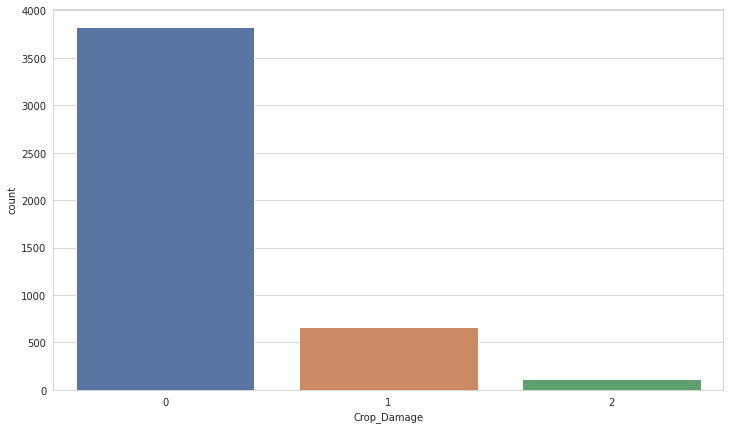

In [8]:
plt.figure().set_size_inches(12,7)
sns.countplot(df['Crop_Damage'])

We have a imbalance class problem, as most of the crops seem to be healthy, very few are damaged by pesticide, and few are damaged by other reasons

### Numeric features 

In [9]:
num = df[['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f371688a1d0>,
      dtype=object)

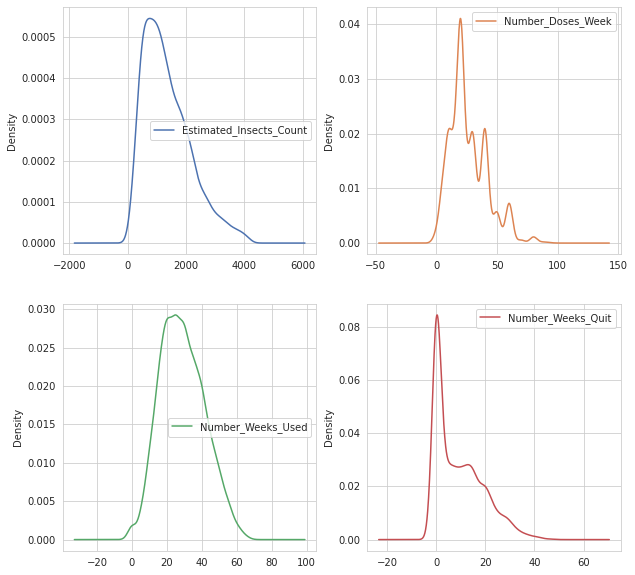

In [10]:
num.plot(kind = 'kde', subplots = True, sharex = False, layout = (2,2), figsize = (10,10))  

Two of the features: Estimated_Insects_Count and Number_Weeks_Used are both Gaussian distributions.
 
Number_Doses_Week, Number_Weeks_Quit don't follow normal distribution

We need to scale these features and maybe do normalization

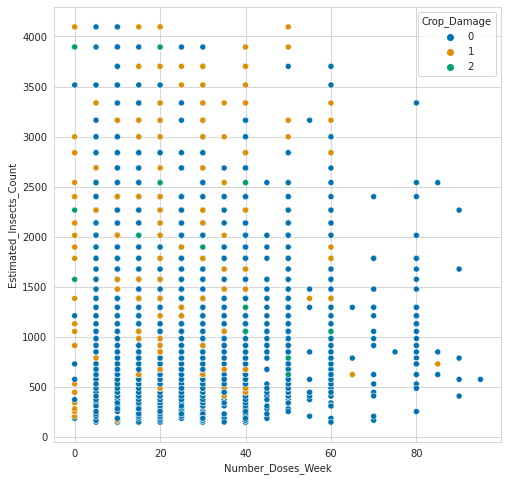

In [11]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(y = 'Estimated_Insects_Count', x = "Number_Doses_Week", hue = 'Crop_Damage', data = df, palette = 'colorblind')

As we see, as the Pesticide use increases, estimated number of insects decreases. Also there is low number of crop damage as the doses increase.

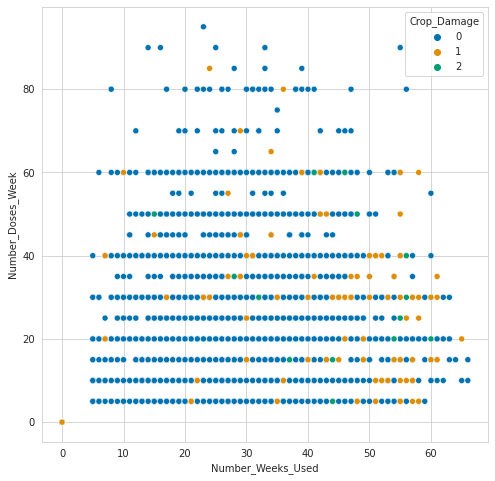

In [12]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(x = 'Number_Weeks_Used', y = "Number_Doses_Week", hue = 'Crop_Damage', data = df, palette = 'colorblind')

As we see from this graph, crop damage by other reasons is more probable if we use small doses for a long time.

Crop Damage due to pesticides is very rare

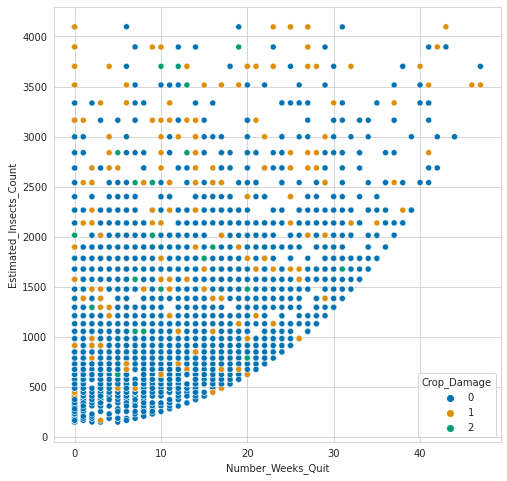

In [13]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(y = 'Estimated_Insects_Count', x = "Number_Weeks_Quit", hue = 'Crop_Damage', data = df, palette = 'colorblind')

Crop Damage by other reason is very prevalent if the farmer quits using Pesticides. Also The estimated Insect Count increases almost exponentially with time

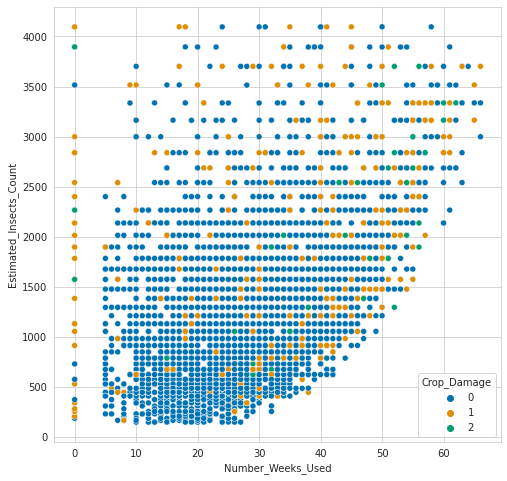

In [14]:
plt.figure().set_size_inches(8,8)
sns.scatterplot(y = 'Estimated_Insects_Count', x = "Number_Weeks_Used", hue = 'Crop_Damage', data = df, palette = 'colorblind')

Even Though the farmer continously uses pesticide, after 30 weeks, the pesticides stops working, and insects count increases

In [15]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### Categorical Features

In [16]:
cat = df[['Crop_Type','Soil_Type','Pesticide_Use_Category', 'Season', 'Crop_Damage']]

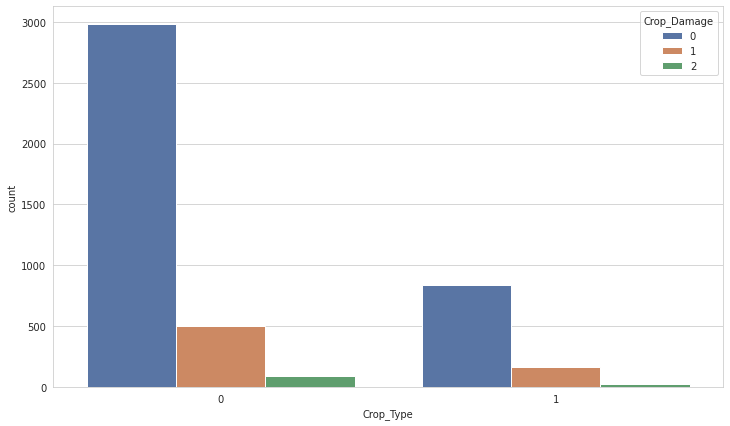

In [17]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Crop_Type', data = cat, hue = 'Crop_Damage')


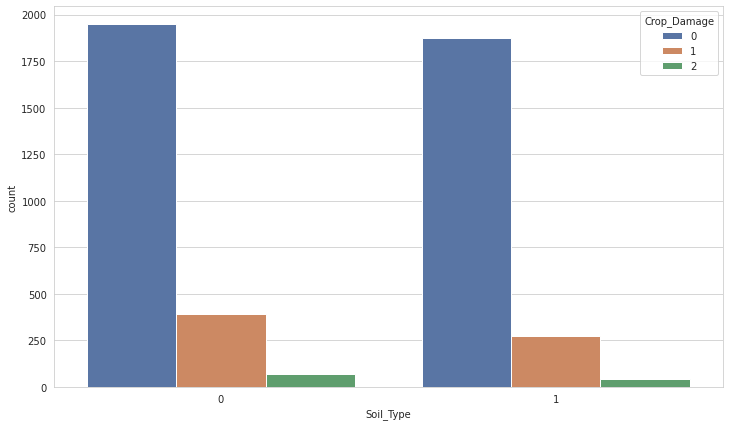

In [18]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Soil_Type', data = cat, hue = 'Crop_Damage')


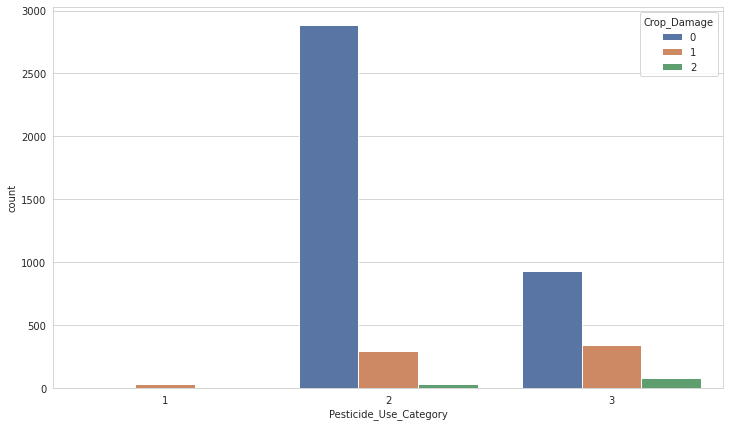

In [19]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Pesticide_Use_Category', data = cat, hue = 'Crop_Damage')


So in type 1, the crop got damaged by other reason.

Type 2 Pesticide seems to be useful, since majority of the crops were alive at harvest.

Type 3 has high proportion of damaged crops (both by other reasons as well as pesticides)

By looking at this graph we can say that Type 2 pesticide seems to be reliable than others.

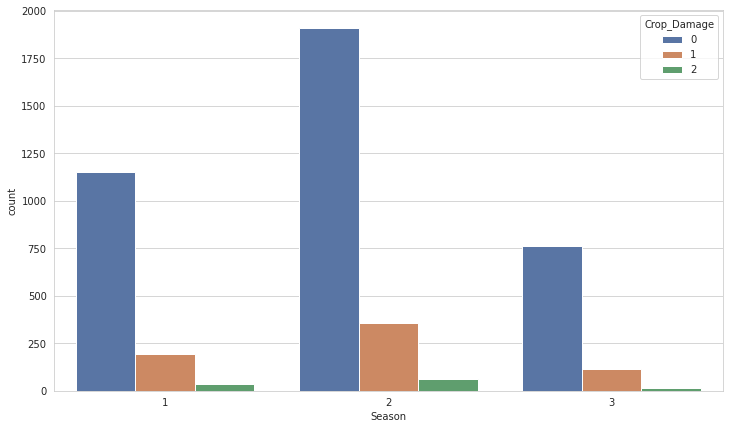

In [20]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'Season', data = cat, hue = 'Crop_Damage')


Season no. 2 seems to have most of the crop harvest, and also a high number of Damaged crops

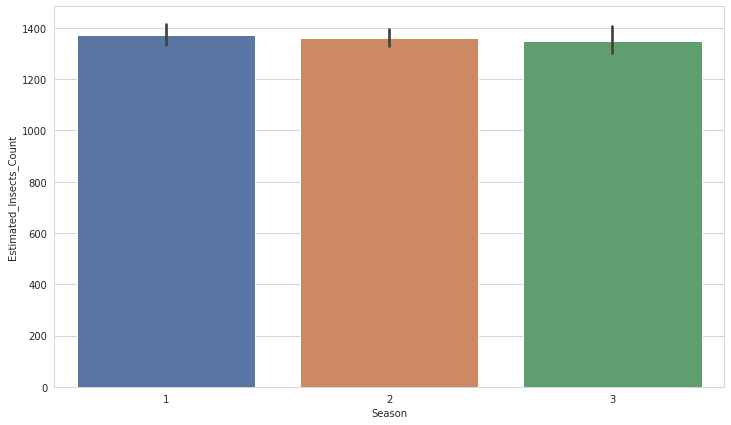

In [21]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Season', y = 'Estimated_Insects_Count', data = df)

So Estimated number of insects remains pretty constant for all the seasons

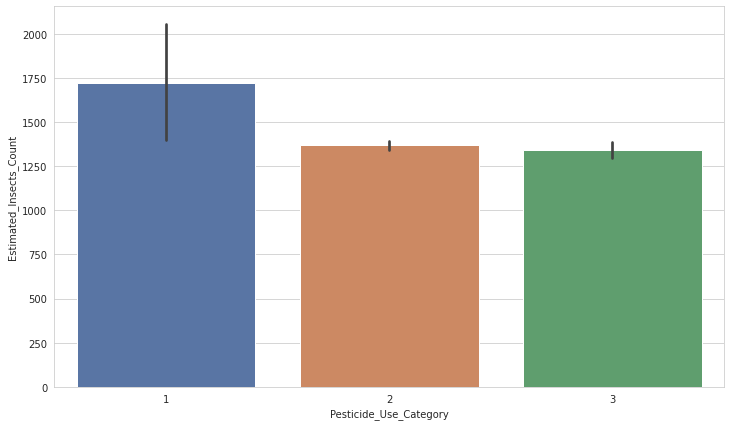

In [22]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', data = df)

Type 1 pesticide seems to have no effect on Insects, while 2 and 3 are effective

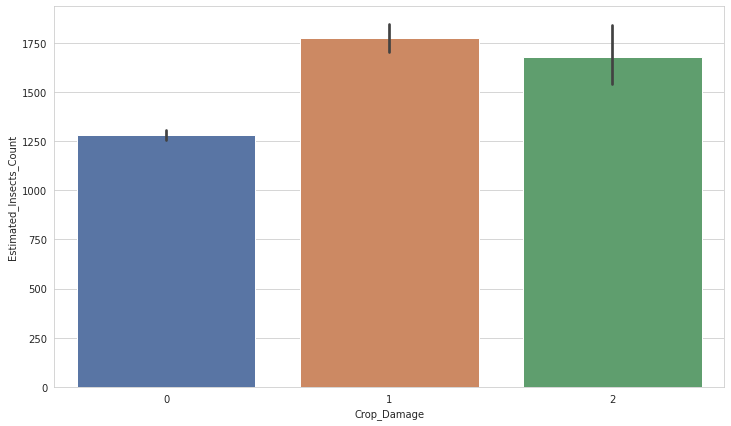

In [23]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'Crop_Damage', y = 'Estimated_Insects_Count', data = df)

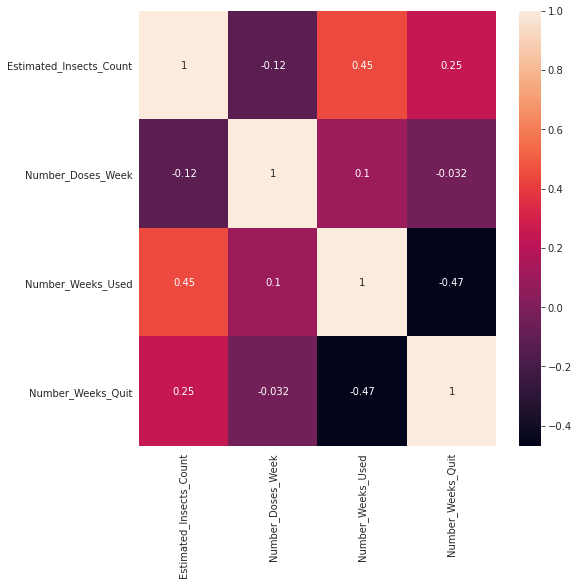

In [24]:
plt.figure().set_size_inches(8,8)
sns.heatmap(num.corr(), annot = True)

all the numeric features are independant of each other

## Data Preprocessing

In [25]:
df.drop("ID", axis = 1, inplace = True)

In [26]:
#Categorical Variables One-Hot-Encoding

In [27]:
for i in cat.columns:
    print(i)
    print(cat[i].unique())

Crop_Type
[1 0]
Soil_Type
[0 1]
Pesticide_Use_Category
[1 3 2]
Season
[1 2 3]
Crop_Damage
[0 1 2]


In [28]:
def encode(column):
    global df
    cols = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df,cols], axis = 1)
    df.drop(column, axis = 1, inplace = True)

In [29]:
encode('Crop_Type')

In [30]:
encode('Soil_Type')

In [31]:
encode("Pesticide_Use_Category")

In [32]:
encode("Season")

In [33]:
df.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,188,0,0.0,0,0,1,0,0,0,0,0
1,209,0,0.0,0,1,1,0,0,0,1,0
2,257,0,0.0,0,1,1,0,0,0,1,0
3,257,0,0.0,0,1,1,1,0,0,1,0
4,342,0,0.0,0,1,1,0,0,0,1,0


In [34]:
#Imputing Null values

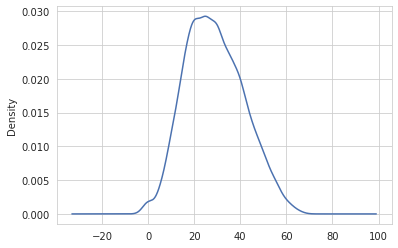

In [35]:
df['Number_Weeks_Used'].plot(kind = 'kde')

As the feature follows a normal distribution and missing value represent approx 10% of the data, we will impute the missing value with median

In [36]:
median = np.median(df['Number_Weeks_Used'].dropna())

In [37]:
df.fillna(median, inplace = True)

In [38]:
df.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,188,0,0.0,0,0,1,0,0,0,0,0
1,209,0,0.0,0,1,1,0,0,0,1,0
2,257,0,0.0,0,1,1,0,0,0,1,0
3,257,0,0.0,0,1,1,1,0,0,1,0
4,342,0,0.0,0,1,1,0,0,0,1,0


In [39]:
#Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop("Crop_Damage", axis =1)
y = df['Crop_Damage']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [65]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [43]:
#Decision Tree Classifer

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dtc = DecisionTreeClassifier(class_weight = 'balanced').fit(X_train_sc, y_train)
y_train_pred = dtc.predict(X_train_sc)
y_test_pred = dtc.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.9981360671015843
Testing accuracy = 0.7427536231884058
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1149
           1       0.24      0.29      0.26       193
           2       0.12      0.11      0.11        38

    accuracy                           0.74      1380
   macro avg       0.41      0.41      0.41      1380
weighted avg       0.76      0.74      0.75      1380



The model is overfitting, and we are getting poor f1-score for class 2

In [45]:
#Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
weights = {0: 0.1, 1: 20, 2:100}
rf = RandomForestClassifier(n_estimators = 1000, class_weight = weights).fit(X_train_sc, y_train)
y_train_pred = rf.predict(X_train_sc)
y_test_pred = rf.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.9981360671015843
Testing accuracy = 0.822463768115942
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1149
           1       0.38      0.16      0.23       193
           2       0.00      0.00      0.00        38

    accuracy                           0.82      1380
   macro avg       0.41      0.37      0.38      1380
weighted avg       0.76      0.82      0.78      1380



Random Forest is performing a bit better than Decision Tree, but still isn't able to classify Class '2'

In [47]:
#Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
weights = {0: 1, 1: 5, 2:10}
lr = LogisticRegression(max_iter = 2000, class_weight = weights).fit(X_train_sc, y_train)
y_train_pred = lr.predict(X_train_sc)
y_test_pred = lr.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.7371854613233924
Testing accuracy = 0.7318840579710145
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1149
           1       0.30      0.61      0.40       193
           2       0.00      0.00      0.00        38

    accuracy                           0.73      1380
   macro avg       0.40      0.46      0.41      1380
weighted avg       0.80      0.73      0.75      1380



We are getting very poor performance for logsitic Regression, 

In [49]:
from sklearn.svm import SVC
svc = SVC().fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)
y_test_pred = svc.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.8381484933209071
Testing accuracy = 0.8369565217391305
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1149
           1       0.62      0.04      0.08       193
           2       0.00      0.00      0.00        38

    accuracy                           0.84      1380
   macro avg       0.48      0.35      0.33      1380
weighted avg       0.78      0.84      0.77      1380



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#KNearestNeighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train_sc, y_train)
y_train_pred = knn.predict(X_train_sc)
y_test_pred = knn.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.8555452003727866
Testing accuracy = 0.8144927536231884
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1149
           1       0.34      0.16      0.22       193
           2       0.00      0.00      0.00        38

    accuracy                           0.81      1380
   macro avg       0.40      0.37      0.37      1380
weighted avg       0.76      0.81      0.78      1380



None of the models are able to classify Class 2 accurately, so trying SMOTE to increase the number of class 1 and class 2 samples

## SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.drop("Crop_Damage", axis =1)
y = df['Crop_Damage']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [53]:
X_train.shape

(8007, 10)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.9991257649556637
Testing accuracy = 0.7246376811594203
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1151
           1       0.22      0.26      0.24       197
           2       0.02      0.03      0.03        32

    accuracy                           0.72      1380
   macro avg       0.37      0.37      0.37      1380
weighted avg       0.75      0.72      0.74      1380



In [55]:
from sklearn.ensemble import RandomForestClassifier
weights = {0: 1, 1: 50, 2:100}

rf = RandomForestClassifier(n_estimators = 1000, class_weight = weights).fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.9991257649556637
Testing accuracy = 0.8115942028985508
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1151
           1       0.34      0.20      0.25       197
           2       0.00      0.00      0.00        32

    accuracy                           0.81      1380
   macro avg       0.40      0.38      0.39      1380
weighted avg       0.77      0.81      0.79      1380



In [56]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000, class_weight = 'balanced').fit(X_train_sc, y_train)
y_train_pred = lr.predict(X_train_sc)
y_test_pred = lr.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.5457724491070314
Testing accuracy = 0.6630434782608695
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1151
           1       0.26      0.25      0.25       197
           2       0.07      0.56      0.12        32

    accuracy                           0.66      1380
   macro avg       0.41      0.52      0.40      1380
weighted avg       0.80      0.66      0.72      1380



In [58]:
from sklearn.svm import SVC
svc = SVC().fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)
y_test_pred = svc.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.7806918945922318
Testing accuracy = 0.7782608695652173
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1151
           1       0.36      0.30      0.33       197
           2       0.03      0.06      0.04        32

    accuracy                           0.78      1380
   macro avg       0.43      0.42      0.42      1380
weighted avg       0.79      0.78      0.79      1380



In [59]:
max_score = 0
k = 0
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sc, y_train)
    y_train_pred = knn.predict(X_train_sc)
    y_test_pred = knn.predict(X_test_sc)
    if max_score < accuracy_score(y_test, y_test_pred):
        max_score = accuracy_score(y_test, y_test_pred)
        k = i
print("Max Score - {}, k = {}".format(max_score, k))

Max Score - 0.7623188405797101, k = 2


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train_sc, y_train)
y_train_pred = knn.predict(X_train_sc)
y_test_pred = knn.predict(X_test_sc)
print("Training accuracy = {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing accuracy = {}".format(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Training accuracy = 0.9750218558761085
Testing accuracy = 0.7623188405797101
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1151
           1       0.23      0.17      0.20       197
           2       0.02      0.03      0.02        32

    accuracy                           0.76      1380
   macro avg       0.37      0.36      0.36      1380
weighted avg       0.75      0.76      0.76      1380



In [61]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer
lr = LogisticRegression(class_weight = 'balanced')
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear', 'sag']}
scorer = make_scorer(f1_score, average = 'micro')
gs = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, scoring = scorer)
gs = gs.fit(X_train_sc,y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.



0.5491460939284981
{'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


Tree based algorithms are giving the best results

We will select Decision Tree Classifier model which is giving good results without applying SMOTE

In [66]:
model = DecisionTreeClassifier().fit(X_train_sc, y_train)
filename = "decisiontree.sav"

In [69]:
import pickle
pickle.dump(model, open(filename, 'wb'))